In [4]:
# data is extract form the kaggle where "create an api token " from kaggle(json file) and upload data json file in the collab system 

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:04<00:00, 254MB/s]
100% 1.06G/1.06G [00:04<00:00, 235MB/s]


In [9]:
# data is come in the zip format unzip it 

In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
# now to pass a data from the train folder we write the custom code using os module but it contain a lot of image (during the process ram power decrease or not sufficient)
# ** for this keras use technique called "generator"
# generator

In [13]:
# generators : data divide into batches in this case ram me chota "batch size load " hota h  use hota h or remove hojata h or next load hota h fir .

# Image data loading "generator" use 

In [14]:
# generators

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# give the batch size description ,and image_size (provide the same image size),
# label_model = int assignemnt it mean cat-0 and dog-1



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
# to set the pixel value in b/w 0 to 1

# this data is store in the numpy array format store is(0-255) and we want to store in normalize - we store in 0 to 1
# so we want to "normarlize" it and store in b/w 0-1

In [16]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

**Build the CNN model**

In [17]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3,3),padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64,kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128,kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [19]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [20]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 110ms/step - loss: 1.4365 - accuracy: 0.5735 - val_loss: 0.6819 - val_accuracy: 0.5256
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6444 - accuracy: 0.6423 - val_loss: 0.6278 - val_accuracy: 0.6562
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5659 - accuracy: 0.7075 - val_loss: 0.6052 - val_accuracy: 0.6894
Epoch 4/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5004 - accuracy: 0.7510 - val_loss: 0.4957 - val_accuracy: 0.7582
Epoch 5/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4456 - accuracy: 0.7874 - val_loss: 0.4649 - val_accuracy: 0.7864
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3955 - accuracy: 0.8153 - val_loss: 0.4603 - val_accuracy: 0.7862
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3440 - accuracy: 0.8417 - val_loss: 0.4240 - val_ac

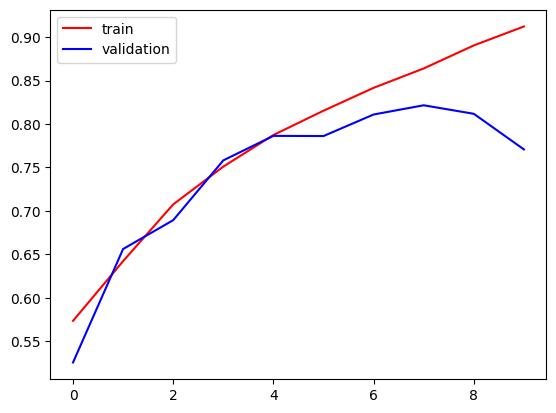

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'],color = 'blue',label = 'validation')
plt.legend()
plt.show()


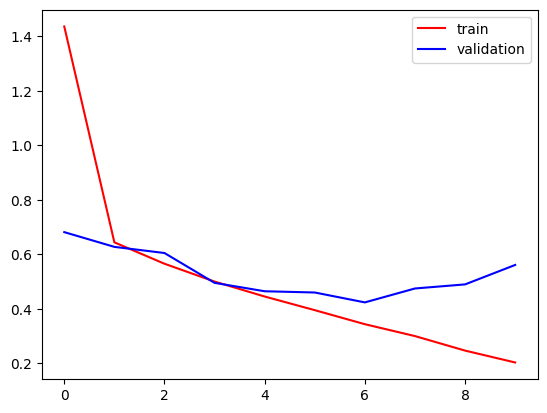

In [22]:

plt.plot(history.history['loss'],color = 'red', label = 'train')
plt.plot(history.history['val_loss'],color = 'blue',label = 'validation')
plt.legend()
plt.show()

overfitting -- over data give better result at training dataset and less result on the testing data set


** Way to reduce the "Overfitting "**
* add more data
* Data Augmentation
* L1/L2 regularizer
* Dropout
* Batch Norm

```
# This is formatted as code
```


* Reduce the complexity

In [23]:
import cv2

In [47]:

test_img = cv2.imread('/content/dog.12490.jpg')

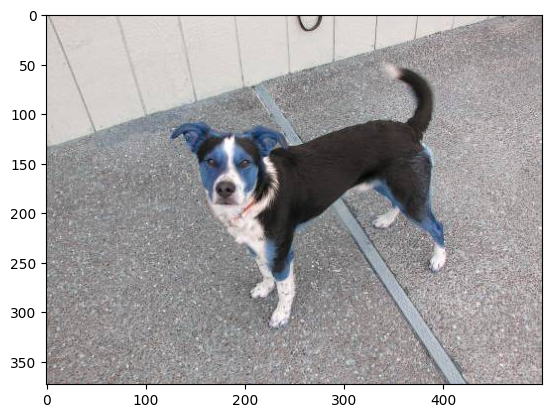

In [48]:
plt.imshow(test_img)

In [49]:
test_img.shape

(373, 500, 3)

In [50]:
# now the resize the image in 256*256 format
test_img = cv2.resize(test_img,(256,256))

In [51]:
# we have pass the model in batches  so we only 1 image then we convert into "4D" Tensor [1 image with dim (256,256,3)]
test_input = test_img.reshape(1,256,256,3)    

In [52]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

In [2]:
# For cat

In [42]:
test1_img = cv2.imread('/content/cat.12472.jpg')

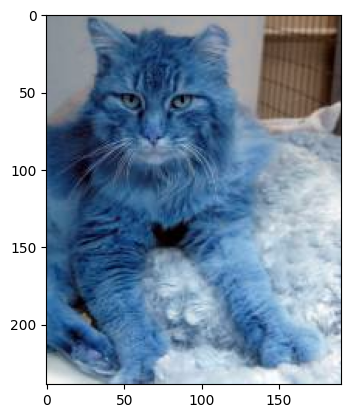

In [43]:
plt.imshow(test1_img)

In [44]:
test1_img = cv2.resize(test1_img,(256,256))


In [45]:
test1_input = test1_img.reshape(1,256,256,3)     # 1 image with dim 256,256,3

In [46]:
model.predict(test1_input)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)